# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
from tqdm import tqdm_notebook as tq

import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [02:12<00:00, 823.45it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [19]:
sent1 = decontracted(project_data['project_title'].values[2000])
print(sent1)
print("="*50)

Steady Stools for Active Learning


In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent1.lower().strip())

100%|██████████| 109248/109248 [00:06<00:00, 17290.42it/s]


In [21]:
project_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_cat_list = []
for i in project_catogories:
    temp = ""
    for j in i.split(','): 
        j = j.replace(' ','_') # we are placeing all the ' '(space) 
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('-','_')
    project_cat_list.append(temp.strip())

project_data['clean_projectcategories'] = project_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_projectcategories'].values:
    my_counter.update(word.split())
    
project_cat_dict = dict(my_counter)
sorted_project_cat_dict = dict(sorted(project_cat_dict.items(), key=lambda kv: kv[1]))


In [22]:
project_data['clean_projectcategories']=project_data['clean_projectcategories'].str.lower()

In [23]:
#for teacher prefix
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data["teacher_prefix"].fillna( method ='ffill', inplace = True)

In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [25]:
project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

1. count the total no of words in essay and make new feature column and add it to dataset
2. same for titles

In [26]:
X_essa=[]
for i in project_data['clean_essays']:
    b=len(i.split())
    X_essa.append(b)
project_data['no_essay']=X_essa
    
    

In [27]:
project_data['clean_titles'] = preprocessed_title

In [28]:
X_tri=[]
for i in project_data['clean_titles']:
    b=len(i.split())
    X_tri.append(b)  
project_data['notitlewords']=X_tri

In [29]:
project_data.drop(['project_title'] , axis=1 , inplace=True)

__Sentiment Score of each of the essay__

__WHAT IS SEMANTIC ANALYSIS?__<BR>
Sentiment Analysis, or Opinion Mining, is a sub-field of Natural Language Processing (NLP) that tries to identify and extract opinions within a given text. The aim of sentiment analysis is to gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.<BR>
https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()

In [32]:
ss_neg=[]
ss_pos=[]
ss_neu=[]
ss_compound=[]
for i in project_data['clean_essays']:
    ss = sid.polarity_scores(i)
    ss_neg.append(ss['neg'])
    ss_neu.append(ss['neu'])
    ss_pos.append(ss['pos'])
    ss_compound.append(ss['compound'])

In [33]:
project_data['ss_neg']=ss_neg
project_data['ss_pos']=ss_pos
project_data['ss_neu']=ss_neu
project_data['ss_compound']=ss_compound

In [34]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,...,price,quantity,clean_essays,no_essay,clean_titles,notitlewords,ss_neg,ss_pos,ss_neu,ss_compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,My students need opportunities to practice beg...,0,0,Literacy_Language,...,154.6,23,my students english learners working english s...,161,educational support english learners home,5,0.012,0.144,0.844,0.9694
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,My students need a projector to help with view...,7,1,History_Civics Health_Sports,...,299.0,1,our students arrive school eager learn they po...,109,wanted projector hungry learners,4,0.048,0.283,0.669,0.9856


In [35]:
project_data.count()

Unnamed: 0                                      109248
id                                              109248
teacher_id                                      109248
teacher_prefix                                  109248
school_state                                    109248
project_submitted_datetime                      109248
project_resource_summary                        109248
teacher_number_of_previously_posted_projects    109248
project_is_approved                             109248
clean_categories                                109248
clean_subcategories                             109248
essay                                           109248
clean_projectcategories                         109248
price                                           109248
quantity                                        109248
clean_essays                                    109248
no_essay                                        109248
clean_titles                                    109248
notitlewor

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [36]:
y=project_data['project_is_approved'].values
project_data.drop(['project_is_approved'] , axis=1, inplace = True)
X=project_data

In [37]:
X.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,...,price,quantity,clean_essays,no_essay,clean_titles,notitlewords,ss_neg,ss_pos,ss_neu,ss_compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,My students need opportunities to practice beg...,0,Literacy_Language,ESL Literacy,...,154.6,23,my students english learners working english s...,161,educational support english learners home,5,0.012,0.144,0.844,0.9694
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,My students need a projector to help with view...,7,History_Civics Health_Sports,Civics_Government TeamSports,...,299.0,1,our students arrive school eager learn they po...,109,wanted projector hungry learners,4,0.048,0.283,0.669,0.9856


__SPLITTING USING TRAIN_TEST_SPLIT__

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [39]:
#Shape of training , test and cross validation data
print("X_train {0} ||  Y_train {1}".format(X_train.shape,y_train.shape))
print("X_cv {0}  || Y_cv {1}".format(X_cv.shape,y_cv.shape))
print("X_test {0} || Y_test {1}".format(X_test.shape,y_test.shape))

X_train (49041, 22) ||  Y_train (49041,)
X_cv (24155, 22)  || Y_cv (24155,)
X_test (36052, 22) || Y_test (36052,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

__2.2.1 vectorizing categorical data __

In [40]:
vectorizer_clean = CountVectorizer()
vectorizer_clean.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_ccat_ohe = vectorizer_clean.transform(X_train['clean_categories'].values)
X_cv_ccat_ohe = vectorizer_clean.transform(X_cv['clean_categories'].values)
X_test_ccat_ohe = vectorizer_clean.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_ccat_ohe.shape, y_train.shape)
print(X_cv_ccat_ohe.shape, y_cv.shape)
print(X_test_ccat_ohe.shape, y_test.shape)
print(vectorizer_clean.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [41]:
vectorizer_clsub = CountVectorizer()
vectorizer_clsub.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cscat_ohe = vectorizer_clsub.transform(X_train['clean_subcategories'].values)
X_cv_cscat_ohe = vectorizer_clsub.transform(X_cv['clean_subcategories'].values)
X_test_cscat_ohe = vectorizer_clsub.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cscat_ohe.shape, y_train.shape)
print(X_cv_cscat_ohe.shape, y_cv.shape)
print(X_test_cscat_ohe.shape, y_test.shape)
print(vectorizer_clsub.get_feature_names())
print("="*100)


After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [42]:
#FOR SCHOOL STATE
vectorizer_school = CountVectorizer()
vectorizer_school.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_school.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_school.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_school.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_school.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [43]:
vectorizer_cp = CountVectorizer()
vectorizer_cp.fit(X_train['clean_projectcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cpro_ohe = vectorizer_cp.transform(X_train['clean_projectcategories'].values)
X_cv_cpro_ohe = vectorizer_cp.transform(X_cv['clean_projectcategories'].values)
X_test_cpro_ohe = vectorizer_cp.transform(X_test['clean_projectcategories'].values)

print("After vectorizations")
print(X_train_cpro_ohe.shape, y_train.shape)
print(X_cv_cpro_ohe.shape, y_cv.shape)
print(X_test_cpro_ohe.shape, y_test.shape)
print(vectorizer_cp.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [44]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


__2.2.2 Vectorizing Numerical Features __

__price__

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Quantity__

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quan_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quan_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quan_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quan_norm.shape, y_train.shape)
print(X_cv_quan_norm.shape, y_cv.shape)
print(X_test_quan_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__no of previous posted project__

In [48]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tno_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_tno_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tno_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tno_norm.shape, y_train.shape)
print(X_cv_tno_norm.shape, y_cv.shape)
print(X_test_tno_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__No of words in titles__

In [49]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['notitlewords'].values.reshape(-1,1))

X_train_titleno_norm = normalizer.transform(X_train['notitlewords'].values.reshape(-1,1))
X_cv_titleno_norm = normalizer.transform(X_cv['notitlewords'].values.reshape(-1,1))
X_test_titleno_norm = normalizer.transform(X_test['notitlewords'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_titleno_norm.shape, y_train.shape)
print(X_cv_titleno_norm.shape, y_cv.shape)
print(X_test_titleno_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__No of words in Essays__

In [50]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['no_essay'].values.reshape(-1,1))

X_train_essayno_norm = normalizer.transform(X_train['no_essay'].values.reshape(-1,1))
X_cv_essayno_norm = normalizer.transform(X_cv['no_essay'].values.reshape(-1,1))
X_test_essayno_norm = normalizer.transform(X_test['no_essay'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essayno_norm.shape, y_train.shape)
print(X_cv_essayno_norm.shape, y_cv.shape)
print(X_test_essayno_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


__Normalize Sentiment Analysis__

In [51]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['ss_neg'].values.reshape(-1,1))

X_train_ssneg_norm = normalizer.transform(X_train['ss_neg'].values.reshape(-1,1))
X_cv_ssneg_norm = normalizer.transform(X_cv['ss_neg'].values.reshape(-1,1))
X_test_ssneg_norm = normalizer.transform(X_test['ss_neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_ssneg_norm.shape, y_train.shape)
print(X_cv_ssneg_norm.shape, y_cv.shape)
print(X_test_ssneg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [52]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['ss_pos'].values.reshape(-1,1))

X_train_sspos_norm = normalizer.transform(X_train['ss_pos'].values.reshape(-1,1))
X_cv_sspos_norm = normalizer.transform(X_cv['ss_pos'].values.reshape(-1,1))
X_test_sspos_norm = normalizer.transform(X_test['ss_pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sspos_norm.shape, y_train.shape)
print(X_cv_sspos_norm.shape, y_cv.shape)
print(X_test_sspos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [53]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['ss_compound'].values.reshape(-1,1))

X_train_sscompound_norm = normalizer.transform(X_train['ss_compound'].values.reshape(-1,1))
X_cv_sscompound_norm = normalizer.transform(X_cv['ss_compound'].values.reshape(-1,1))
X_test_sscompound_norm = normalizer.transform(X_test['ss_compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sscompound_norm.shape, y_train.shape)
print(X_cv_sscompound_norm.shape, y_cv.shape)
print(X_test_sscompound_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [54]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['ss_neu'].values.reshape(-1,1))

X_train_ssneu_norm = normalizer.transform(X_train['ss_neu'].values.reshape(-1,1))
X_cv_ssneu_norm = normalizer.transform(X_cv['ss_neu'].values.reshape(-1,1))
X_test_ssneu_norm = normalizer.transform(X_test['ss_neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_ssneu_norm.shape, y_train.shape)
print(X_cv_ssneu_norm.shape, y_cv.shape)
print(X_test_ssneu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

__2.3.1 BAG OF WORDS __

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizerb = CountVectorizer(min_df=10, max_features=5000)
vectorizerb.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizerb.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizerb.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizerb.transform(X_test['clean_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [56]:
# BOW project titles
from sklearn.feature_extraction.text import CountVectorizer
vectorizert = CountVectorizer(min_df=10, max_features=5000)
vectorizert.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizert.transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizert.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizert.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)


After vectorizations
(49041, 1983) (49041,)
(24155, 1983) (24155,)
(36052, 1983) (36052,)


__TFIDF__

In [57]:
#FOR ESSAY
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tf = TfidfVectorizer(min_df=10,max_features=5000)
vectorizer_tf.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_tf.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer_tf.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer_tf.transform(X_test['clean_essays'].values)

print(X_train_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(49041, 5000)
(24155, 5000)
(36052, 5000)


In [58]:
#for project title
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer_t = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_t.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer_t.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer_t.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer_t.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (49041, 1983)
CV shape: (24155, 1983)
Test shape: (36052, 1983)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [59]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tq(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

Loading Glove Model



Done. 1917494  words loaded!


In [60]:
words_train_essays = []

for i in X_train['clean_essays']:
    words_train_essays.extend(i.split(' '))

In [61]:
## Find the total number of words in the Train data of Essays.

print("all the words in the corpus", len(words_train_essays))

all the words in the corpus 7429339


In [62]:
## Find the unique words in this set of words

words_train_essay = set(words_train_essays)
print("the unique words in the corpus", len(words_train_essay))

the unique words in the corpus 41315


In [63]:
## Find the words present in both Glove Vectors as well as our corpus.

inter_words = set(model.keys()).intersection(words_train_essay)

print("The number of words that are present in both glove vectors and our corpus are {} which \
is nearly {}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essay))*100)))

The number of words that are present in both glove vectors and our corpus are 37962 which is nearly 92.0% 


In [64]:
words_corpus_train_essay = {}

words_glove = set(model.keys())

for i in words_train_essay:
    if i in words_glove:
        words_corpus_train_essay[i] = model[i]

print("word 2 vec length", len(words_corpus_train_essay))

word 2 vec length 37962


In [65]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essay, f)


In [66]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

__train essay for avg w2v__

In [67]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tq(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


49041
300


__Test Essays__

In [68]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tq(X_test['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))


36052
300


__Cross Validation__

In [69]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_cv = []; 

for sentence in tq(X_cv['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))


24155
300


__train titles__

In [70]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_train['clean_titles']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))


49041
300


__test titles__

In [71]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_test['clean_titles']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))


36052
300


__cross validation titles__

In [72]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_cv['clean_titles']): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))


24155
300


__TFIDF Weighted W2V__

In [73]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))


49041
300


In [75]:
# compute average word2vec for each review.
#test essay

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_test['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))


36052
300


In [76]:
# compute average word2vec for each review.
#cross validation essay
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tq(X_cv['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))


24155
300


__train titles__

In [77]:
tfidf_w2v_vectors_titles_train = []; 

for sentence in tq(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))


49041
300


In [78]:
# compute average word2vec for each review.
#test titles
tfidf_w2v_vectors_titles_test = []; 

for sentence in tq(X_test['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))


36052
300


In [79]:
# compute average word2vec for each review.
#cross validation titles
tfidf_w2v_vectors_titles_cv = []; 

for sentence in tq(X_cv['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))


24155
300


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

__LOGISTIC REGRESSION ON BAG OF WORDS__

__COMBINING ALL FEATURES__

In [80]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_trs1 = hstack((X_train_ccat_ohe , X_train_cscat_ohe , X_train_state_ohe, X_train_cpro_ohe , X_train_teacher_ohe, X_train_essay_bow, X_train_titles_bow , X_train_price_norm, X_train_quan_norm , X_train_tno_norm)).tocsr()
X_cvs1 = hstack((X_cv_ccat_ohe , X_cv_cscat_ohe , X_cv_state_ohe, X_cv_cpro_ohe , X_cv_teacher_ohe, X_cv_essay_bow, X_cv_titles_bow , X_cv_price_norm, X_cv_quan_norm , X_cv_tno_norm)).tocsr()
X_tes1 = hstack((X_test_ccat_ohe , X_test_cscat_ohe , X_test_state_ohe, X_test_cpro_ohe , X_test_teacher_ohe, X_test_essay_bow, X_test_titles_bow , X_test_price_norm, X_test_quan_norm , X_test_tno_norm)).tocsr()

In [81]:
print("Final Data matrix")
print(X_trs1.shape, y_train.shape)
print(X_cvs1.shape, y_cv.shape)
print(X_tes1.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7085) (49041,)
(24155, 7085) (24155,)
(36052, 7085) (36052,)


In [82]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred


In [83]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
para= []
tuned_parameters = [ 0.01,0.05, 0.1,0.5,1,5,10]

for i in tq(tuned_parameters):
    lr = LogisticRegression(penalty='l1',C=i,class_weight='balanced')
    lr.fit(X_trs1, y_train)

    y_train_pred = batch_predict(lr, X_trs1)    
    y_cv_pred = batch_predict(lr, X_cvs1)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

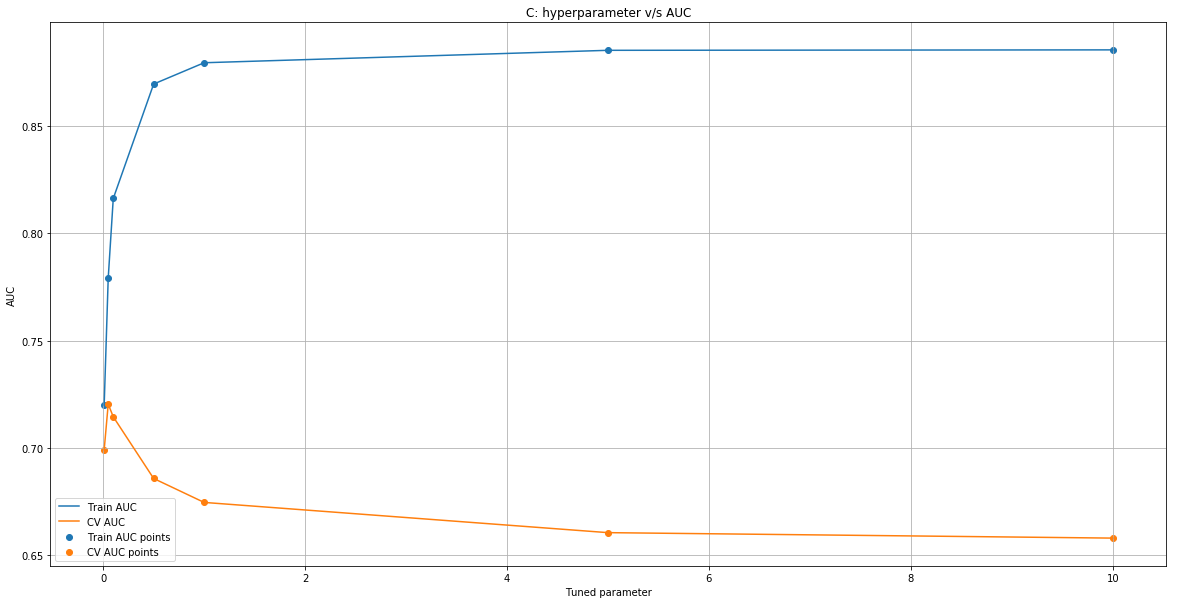

In [84]:
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters, train_auc, label='Train AUC')
plt.plot(tuned_parameters, cv_auc, label='CV AUC')

plt.scatter(tuned_parameters, train_auc, label='Train AUC points')
plt.scatter(tuned_parameters, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Tuned parameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [85]:
best_C=0.01

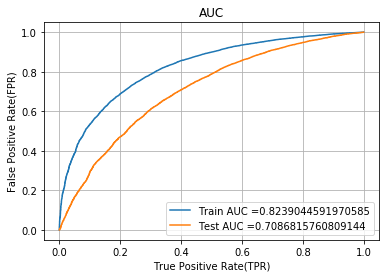

In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = best_C ,class_weight='balanced' )

model.fit(X_trs1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_trs1)    
y_test_pred = batch_predict(model, X_tes1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [87]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [88]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.351
[[ 3713  3713]
 [ 4181 37434]]


In [89]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.351


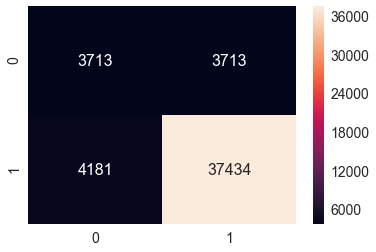

In [90]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

__TEST DATA__

In [91]:

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.416
[[ 2626  2833]
 [ 5994 24599]]


In [92]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.416


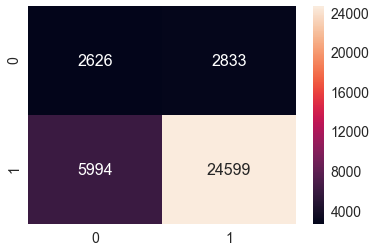

In [93]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

__SET-2 categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay__ 

In [94]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_ccat_ohe , X_train_cscat_ohe , X_train_state_ohe, X_train_cpro_ohe , X_train_teacher_ohe, X_train_essay_tfidf, X_train_titles_tfidf , X_train_price_norm, X_train_quan_norm , X_train_tno_norm)).tocsr()
X_cr = hstack((X_cv_ccat_ohe , X_cv_cscat_ohe , X_cv_state_ohe, X_cv_cpro_ohe , X_cv_teacher_ohe, X_cv_essay_tfidf, X_cv_titles_tfidf , X_cv_price_norm, X_cv_quan_norm , X_cv_tno_norm)).tocsr()
X_te = hstack((X_test_ccat_ohe , X_test_cscat_ohe , X_test_state_ohe, X_test_cpro_ohe , X_test_teacher_ohe, X_test_essay_tfidf, X_test_titles_tfidf , X_test_price_norm, X_test_quan_norm , X_test_tno_norm)).tocsr()

In [95]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
para= []
tuned_parameters = [ 0.01,0.05, 0.1,0.5,1,5,10]

for i in tq(tuned_parameters):
    lr = LogisticRegression(penalty='l1',C=i,class_weight='balanced')
    lr.fit(X_tr, y_train)

    y_train_pred = batch_predict(lr, X_tr)    
    y_cv_pred = batch_predict(lr, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

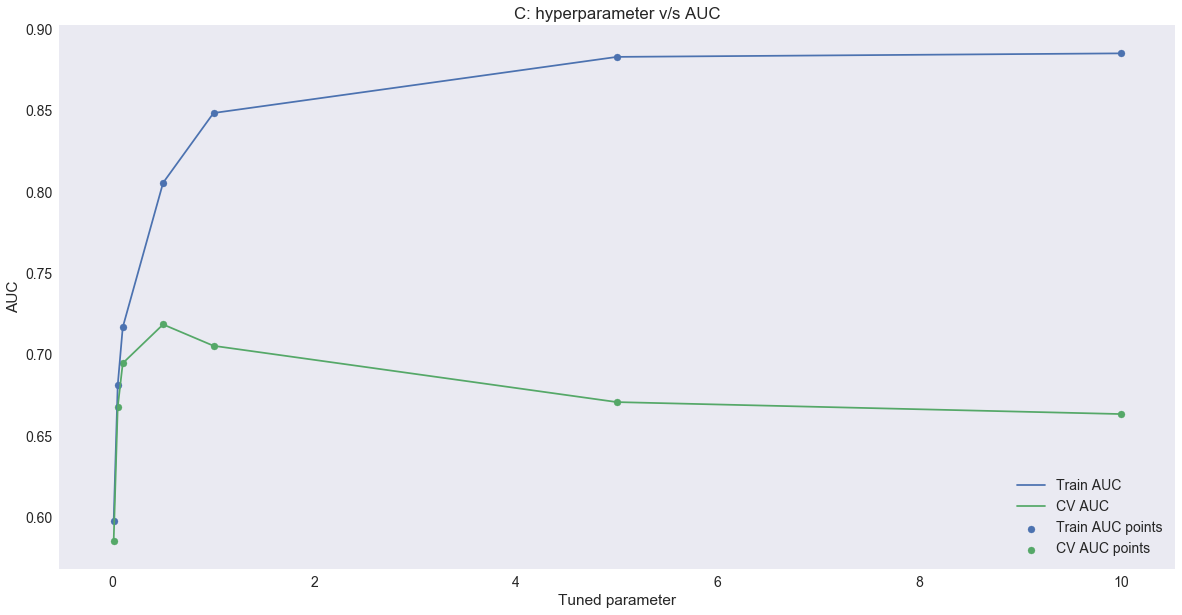

In [96]:
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters, train_auc, label='Train AUC')
plt.plot(tuned_parameters, cv_auc, label='CV AUC')

plt.scatter(tuned_parameters, train_auc, label='Train AUC points')
plt.scatter(tuned_parameters, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Tuned parameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [97]:
best_C=0.1

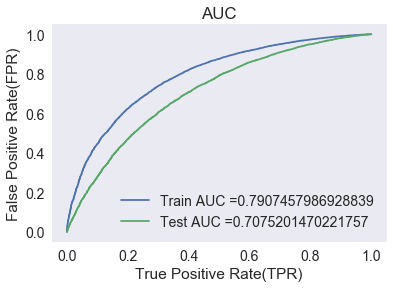

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = best_C ,class_weight='balanced')

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

__CONFUSION MATRIX__

TRAIN DATA

In [99]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.408
[[ 3713  3713]
 [ 5190 36425]]


In [100]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.408


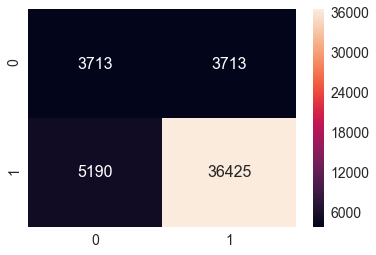

In [101]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

TEST DATA

In [102]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.462
[[ 2874  2585]
 [ 7149 23444]]


In [103]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.462


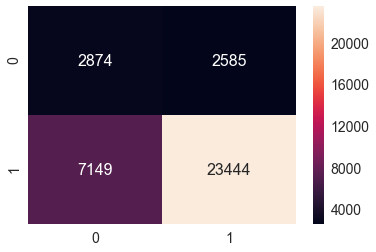

In [104]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

__SET 3:categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)__

In [105]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_ccat_ohe , X_train_cscat_ohe , X_train_state_ohe, X_train_cpro_ohe , X_train_teacher_ohe,avg_w2v_vectors_train,avg_w2v_vectors_titles_train, X_train_price_norm, X_train_quan_norm , X_train_tno_norm)).tocsr()
X_cr = hstack((X_cv_ccat_ohe , X_cv_cscat_ohe , X_cv_state_ohe, X_cv_cpro_ohe , X_cv_teacher_ohe, avg_w2v_vectors_cv,avg_w2v_vectors_titles_cv , X_cv_price_norm, X_cv_quan_norm , X_cv_tno_norm)).tocsr()
X_te = hstack((X_test_ccat_ohe , X_test_cscat_ohe , X_test_state_ohe, X_test_cpro_ohe , X_test_teacher_ohe, avg_w2v_vectors_test,avg_w2v_vectors_titles_test, X_test_price_norm, X_test_quan_norm , X_test_tno_norm)).tocsr()

In [106]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
para= []
tuned_parameters = [ 0.01,0.05, 0.1,0.5,1,5,10]

for i in tq(tuned_parameters):
    lr = LogisticRegression(penalty='l1',C=i)
    lr.fit(X_tr, y_train)

    y_train_pred = batch_predict(lr, X_tr)    
    y_cv_pred = batch_predict(lr, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

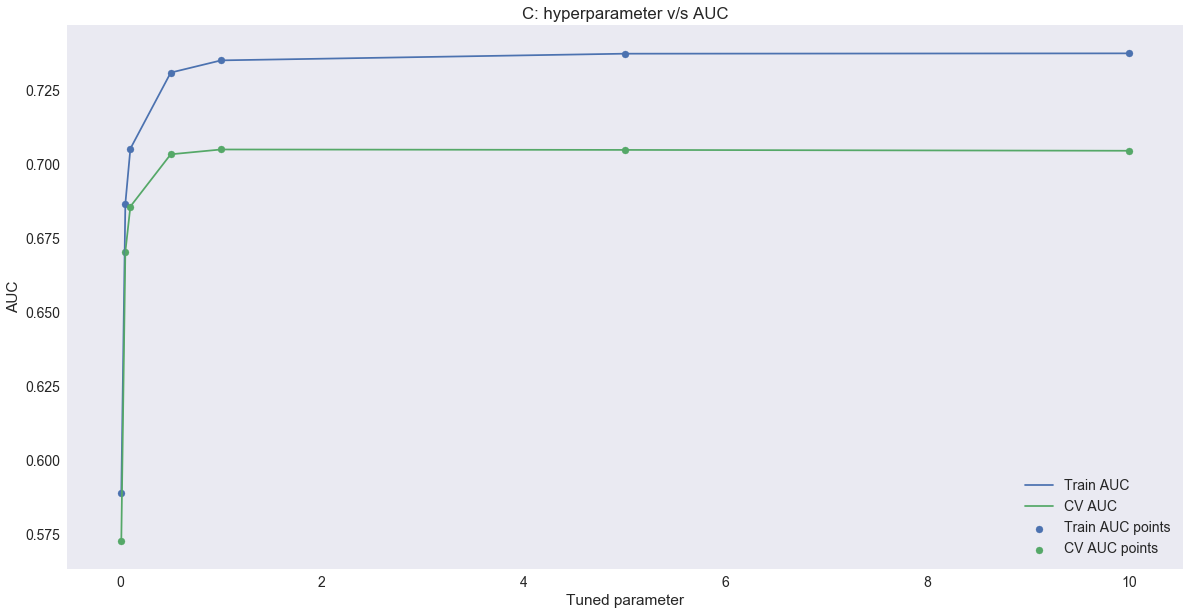

In [107]:
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters, train_auc, label='Train AUC')
plt.plot(tuned_parameters, cv_auc, label='CV AUC')

plt.scatter(tuned_parameters, train_auc, label='Train AUC points')
plt.scatter(tuned_parameters, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Tuned parameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [108]:
best_C=0.5

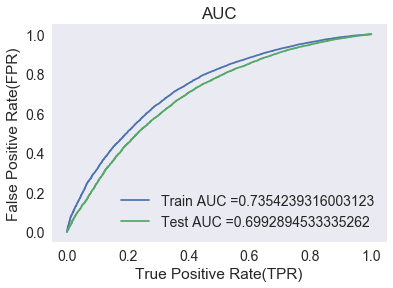

In [109]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = best_C,penalty='l1',class_weight='balanced')

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

__TRAIN CONFUSION MATRIX__

In [110]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.402
[[ 3713  3713]
 [ 7208 34407]]


In [111]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.25 for threshold 0.402


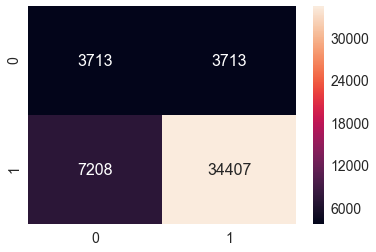

In [112]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

__TEST CONFUSION MATRIX__

In [113]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.473
[[ 3291  2168]
 [ 9129 21464]]


In [114]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.473


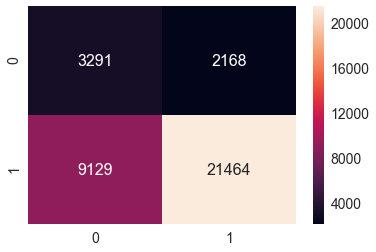

In [115]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

__SET 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)__

In [116]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_ccat_ohe , X_train_cscat_ohe , X_train_state_ohe, X_train_cpro_ohe , X_train_teacher_ohe,tfidf_w2v_vectors_train,tfidf_w2v_vectors_titles_train, X_train_price_norm, X_train_quan_norm , X_train_tno_norm)).tocsr()
X_cr = hstack((X_cv_ccat_ohe , X_cv_cscat_ohe , X_cv_state_ohe, X_cv_cpro_ohe , X_cv_teacher_ohe, tfidf_w2v_vectors_cv,tfidf_w2v_vectors_titles_cv , X_cv_price_norm, X_cv_quan_norm , X_cv_tno_norm)).tocsr()
X_te = hstack((X_test_ccat_ohe , X_test_cscat_ohe , X_test_state_ohe, X_test_cpro_ohe , X_test_teacher_ohe, tfidf_w2v_vectors_test,tfidf_w2v_vectors_titles_test, X_test_price_norm, X_test_quan_norm , X_test_tno_norm)).tocsr()

In [117]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
para= []
tuned_parameters = [ 0.01,0.05, 0.1,0.5,1,5,10]

for i in tq(tuned_parameters):
    lr = LogisticRegression(penalty='l1',C=i,class_weight='balanced')
    lr.fit(X_tr, y_train)

    y_train_pred = batch_predict(lr, X_tr)    
    y_cv_pred = batch_predict(lr, X_cr)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

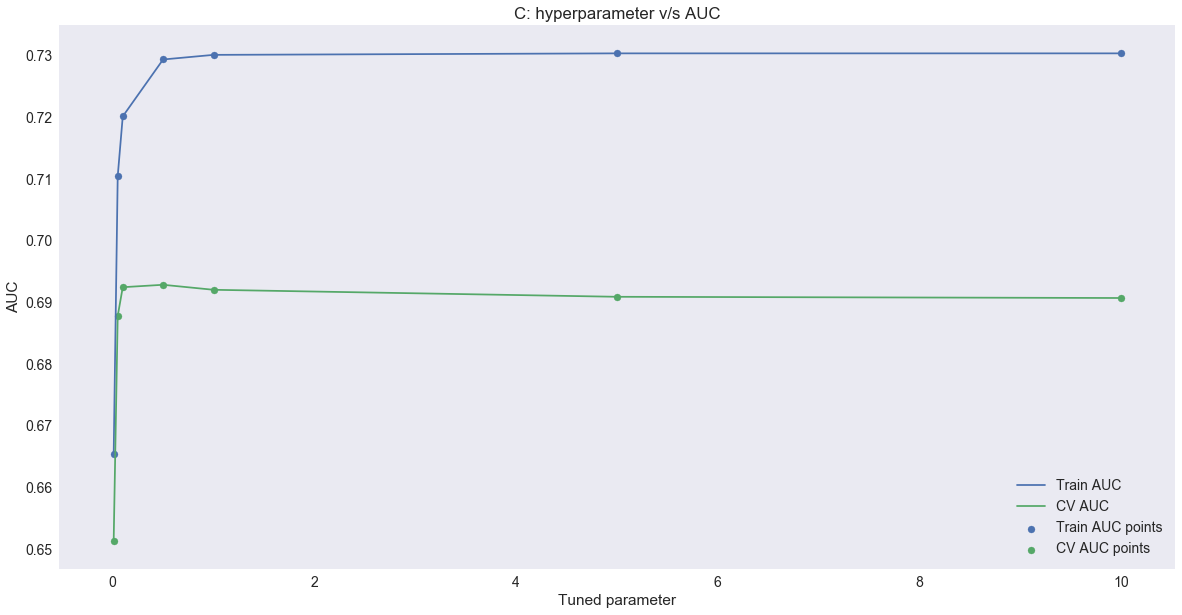

In [118]:
plt.figure(figsize=(20,10))
plt.plot(tuned_parameters, train_auc, label='Train AUC')
plt.plot(tuned_parameters, cv_auc, label='CV AUC')

plt.scatter(tuned_parameters, train_auc, label='Train AUC points')
plt.scatter(tuned_parameters, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Tuned parameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [119]:

best_C=0.1

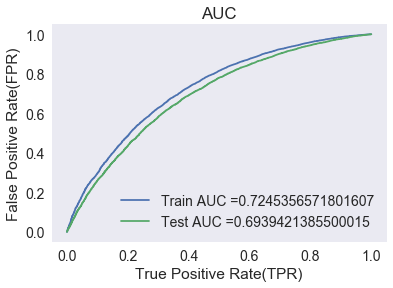

In [120]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = best_C )

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

__TRAIN CONFUSION MATRIX__

In [121]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.79
[[ 3714  3712]
 [ 7698 33917]]


In [122]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))


the maximum value of tpr*(1-fpr) 0.2499999818661462 for threshold 0.79


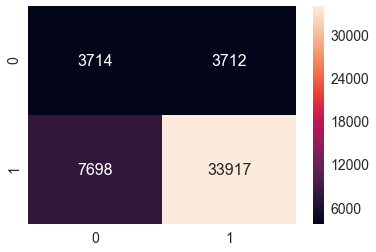

In [123]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

__TEST CONFUSION MATRIX__

In [124]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.832
[[ 3329  2130]
 [ 9686 20907]]


In [125]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999999161092998 for threshold 0.832


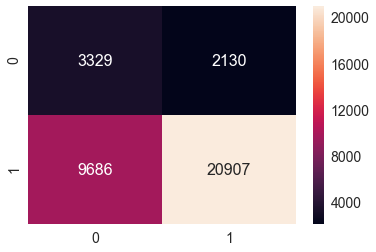

In [126]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

In [127]:
len(X_train)

49041

## <h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [128]:
from scipy.sparse import hstack
X_train_add = hstack((X_train_ccat_ohe , X_train_cscat_ohe , X_train_state_ohe, X_train_cpro_ohe , X_train_teacher_ohe, X_train_price_norm, X_train_quan_norm , X_train_tno_norm,X_train_titleno_norm,X_train_essayno_norm,X_train_ssneg_norm,X_train_sspos_norm,X_train_sscompound_norm,X_train_ssneu_norm)).tocsr()
X_cv_add=hstack((X_cv_ccat_ohe , X_cv_cscat_ohe , X_cv_state_ohe, X_cv_cpro_ohe , X_cv_teacher_ohe, X_cv_price_norm, X_cv_quan_norm , X_cv_tno_norm,X_cv_titleno_norm,X_cv_essayno_norm,X_cv_ssneg_norm,X_cv_sspos_norm,X_cv_sscompound_norm,X_cv_ssneu_norm)).tocsr()
X_test_add= hstack((X_test_ccat_ohe , X_test_cscat_ohe , X_test_state_ohe, X_test_cpro_ohe , X_test_teacher_ohe,X_test_price_norm, X_test_quan_norm , X_test_tno_norm,X_test_titleno_norm,X_test_essayno_norm,X_test_ssneg_norm,X_test_sspos_norm,X_test_sscompound_norm,X_test_ssneu_norm)).tocsr()


In [129]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

    

In [130]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
tuned_parameters = [ 0.01,0.05, 0.1,0.5,1,5,10]

for i in tq(tuned_parameters):
    lr = LogisticRegression(penalty='l1',C=i,class_weight='balanced')
    lr.fit(X_train_add, y_train)

    y_train_pred = batch_predict(lr, X_train_add)    
    y_cv_pred = batch_predict(lr, X_cv_add)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

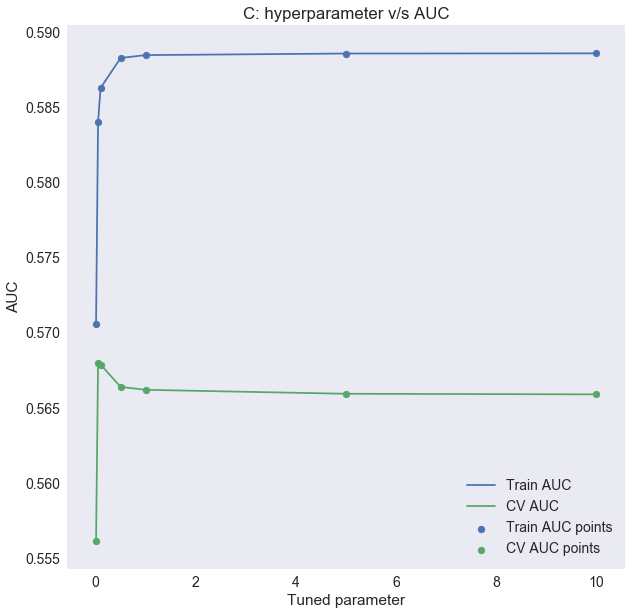

In [131]:
plt.figure(figsize=(10,10))
plt.plot(tuned_parameters, train_auc, label='Train AUC')
plt.plot(tuned_parameters, cv_auc, label='CV AUC')

plt.scatter(tuned_parameters, train_auc, label='Train AUC points')
plt.scatter(tuned_parameters, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Tuned parameter")
plt.ylabel("AUC")
plt.title("C: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [132]:
best_C=0.5

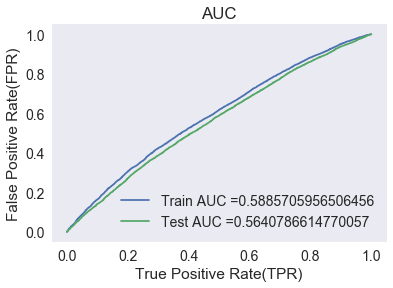

In [133]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(C = best_C , class_weight='balanced')

model.fit(X_train_add, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_train_add)    
y_test_pred = batch_predict(model, X_test_add)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

<h1>3. Conclusion</h1>

In [20]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "tuned_parameter:@", "AUC","Which regularization performs better"]

x.add_row(["BOW", "Support Vector Machine", "L1:0.01" " L2:0.01", "L1:0.70" " L2:0.71","L2 performs better than L1"])
x.add_row(["TFIDF", "Support Vector Machine", "L1:0.0001" " L2:0.005", "L1:0.70" " L2:0.67","L1 performs better than L2"])
x.add_row(["AVG W2V", "Support Vector Machine","L1:0.0001" " L2:0.0005", "L1:0.67" " L2:0.67","Both perfoms same"])
x.add_row(["TFIDF W2V", "Support Vector Machine","L1:0.0005" " L2:0.005", "L1:0.70" " L2:0.68","L1 performs better than L2"])
x.add_row(["WITHOUT TEXT", "Support Vector Machine","L1:0.0005" " L2:0.001", "L1:0.55" " L2:0.55","Both perfoms same"])


print(x)

+--------------+------------------------+---------------------+-----------------+--------------------------------------+
|  Vectorizer  |         Model          |  tuned_parameter:@  |       AUC       | Which regularization performs better |
+--------------+------------------------+---------------------+-----------------+--------------------------------------+
|     BOW      | Support Vector Machine |   L1:0.01 L2:0.01   | L1:0.70 L2:0.71 |      L2 performs better than L1      |
|    TFIDF     | Support Vector Machine |  L1:0.0001 L2:0.005 | L1:0.70 L2:0.67 |      L1 performs better than L2      |
|   AVG W2V    | Support Vector Machine | L1:0.0001 L2:0.0005 | L1:0.67 L2:0.67 |          Both perfoms same           |
|  TFIDF W2V   | Support Vector Machine |  L1:0.0005 L2:0.005 | L1:0.70 L2:0.68 |      L1 performs better than L2      |
| WITHOUT TEXT | Support Vector Machine |  L1:0.0005 L2:0.001 | L1:0.55 L2:0.55 |          Both perfoms same           |
+--------------+----------------

__OBSERVATION__
1. from above graph we understand that the AUC score cannot be more than 0.7
2. when we plot ROC AUC curve without text data the AUC score is 0.56 <br>
which is less than other model<br>
3. Text plays important role in data Analysis .
4. Naive Bayes is better on this dataset as compared to Logistic because train time is less<br> and accuracy score is good.

**END**